In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jogos = pd.read_csv('data/matches_FLA2023.csv', parse_dates=['kick-off'])
gols = pd.read_csv('data/goal_scorers.csv')

In [3]:
jogos.shape

(38, 8)

In [4]:
gols.head()

,id_match,gols,assist
0,CA1,Matheus França,Thiaguinho
1,CA2,Pedro,Ayrton Lucas
2,CA2,Gabi,Pedro
3,CA2,Fabrício Bruno,Pedro
4,CA2,Thiago Maia,Matheuzinho


In [5]:
df = pd.merge(jogos, gols, on = 'id_match')
df.head()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium,gols,assist
0,CA1,Flamengo,Audax-RJ,1,0,Carioca - Taça Guanabara - Round 5,2023-01-12 21:30:00,Maracanã-RJ,Matheus França,Thiaguinho
1,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Pedro,Ayrton Lucas
2,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Gabi,Pedro
3,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Fabrício Bruno,Pedro
4,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Thiago Maia,Matheuzinho


In [6]:
df_gols_counts = pd.DataFrame(df.gols.value_counts())
df_gols_counts = df_gols_counts.reset_index()
df_gols_counts.columns = ['Jogador', 'Gols'] 
print(df_gols_counts.to_markdown(index=False))

| Jogador           |   Gols |
|:------------------|-------:|
| Pedro             |     23 |
| Gabi              |     16 |
| Ayrton Lucas      |      6 |
| Matheus França    |      3 |
| Arrascaeta        |      3 |
| Fabrício Bruno    |      3 |
| Léo Pereira       |      3 |
| Gerson            |      3 |
| Everton Cebolinha |      2 |
| Matheus Gonçalves |      2 |
| Thiago Maia       |      2 |
| André Luiz        |      1 |
| Lorran            |      1 |
| Everton Ribeiro   |      1 |
| David Luiz        |      1 |
| Eric Pulgar       |      1 |
| Wesley            |      1 |
| Victor Hugo       |      1 |


In [7]:
df_assist_counts = pd.DataFrame(df.assist.value_counts())
df_assist_counts = df_assist_counts.reset_index()
df_assist_counts.columns = ['Jogador', 'Assistência'] 
print(df_assist_counts.to_markdown(index=False))

| Jogador           |   Assistência |
|:------------------|--------------:|
| Everton Cebolinha |             8 |
| Arrascaeta        |             5 |
| Ayrton Lucas      |             5 |
| Gerson            |             5 |
| Matheuzinho       |             4 |
| Pedro             |             3 |
| Everton Ribeiro   |             3 |
| Marinho           |             3 |
| Gabi              |             2 |
| Arturo Vidal      |             2 |
| Mateusão          |             2 |
| Eric Pulgar       |             2 |
| Fabricio Bruno    |             2 |
| David Luiz        |             1 |
| Thiaguinho        |             1 |
| Victor Hugo       |             1 |
| Pablo             |             1 |
| Filipe Luis       |             1 |
| Wesley            |             1 |


In [8]:
new_df = pd.concat([df_assist_counts, df_gols_counts], axis=1)

print(new_df.to_markdown(index=False))

| Jogador           |   Assistência | Jogador           |   Gols |
|:------------------|--------------:|:------------------|-------:|
| Everton Cebolinha |             8 | Pedro             |     23 |
| Arrascaeta        |             5 | Gabi              |     16 |
| Ayrton Lucas      |             5 | Ayrton Lucas      |      6 |
| Gerson            |             5 | Matheus França    |      3 |
| Matheuzinho       |             4 | Arrascaeta        |      3 |
| Pedro             |             3 | Fabrício Bruno    |      3 |
| Everton Ribeiro   |             3 | Léo Pereira       |      3 |
| Marinho           |             3 | Gerson            |      3 |
| Gabi              |             2 | Everton Cebolinha |      2 |
| Arturo Vidal      |             2 | Matheus Gonçalves |      2 |
| Mateusão          |             2 | Thiago Maia       |      2 |
| Eric Pulgar       |             2 | André Luiz        |      1 |
| Fabricio Bruno    |             2 | Lorran            |     

In [9]:
vitorias_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] > jogos['away_score'])]
derrotas_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] < jogos['away_score'])]

vitorias_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] > jogos['home_score'])]
derrota_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] < jogos['home_score'])]

empate_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['away_score'] == jogos['home_score'])]
empate_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] == jogos['home_score'])]

In [10]:
vitorias = vitorias_casa.shape[0] + vitorias_fora.shape[0]
empates = empate_casa.shape[0] + empate_fora.shape[0]
derrotas = derrotas_casa.shape[0] + derrota_fora.shape[0]
total_jogos = vitorias + empates + derrotas

In [11]:
j_marcou_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] > 0)]
j_marcou_fora =  jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] > 0)]

jogou_marcou = j_marcou_casa.shape[0] + j_marcou_fora.shape[0]

In [12]:
j_sofreu_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['away_score'] > 0)]
j_sofreu_fora =  jogos[(jogos['away_team'] == 'Flamengo') & (jogos['home_score'] > 0)]

jogou_sofreu = j_sofreu_casa.shape[0] + j_sofreu_fora.shape[0]

In [13]:
gols_pro = vitorias_casa['home_score'].sum() + derrotas_casa['home_score'].sum() + vitorias_fora['away_score'].sum() + derrota_fora['away_score'].sum() + empate_casa['home_score'].sum() + empate_fora['away_score'].sum()
gols_per_jogo = round(gols_pro/total_jogos,2)

In [14]:
gols_contra = vitorias_casa['away_score'].sum() + derrotas_casa['away_score'].sum() + vitorias_fora['home_score'].sum() + derrota_fora['home_score'].sum() + empate_casa['away_score'].sum() + empate_fora['home_score'].sum()
gols_sofrido_jogo = round(gols_contra/total_jogos,2)

In [15]:
saldo_gols = gols_pro - gols_contra

In [16]:
aproveitamento = round((3*vitorias + 1*empates + 0*derrotas)/(3*total_jogos)*100,2)
aproveitamento_pontos = (3*vitorias + 1*empates + 0*derrotas)

In [17]:
print(
"""
Jogos: {0}
Vitórias: {1}
Empates: {2}
Derrotas: {3} 
Gols pro: {4}
Gols contra: {5}
Saldo de gols: +{6}
Gols/jogo: {7}
Gols sofridos/jogo: {13}
Jogos em que marcou: {8}
Jogos em que sofreu gol: {9} 
Aproveitamento: {10}%
Aproveitamento pontos: {11}/{12}
""".format(total_jogos, vitorias, empates, derrotas, 
           gols_pro, gols_contra, saldo_gols, gols_per_jogo, jogou_marcou, 
           jogou_sofreu,aproveitamento,aproveitamento_pontos, 3*total_jogos,gols_sofrido_jogo) 


)


Jogos: 38
Vitórias: 21
Empates: 6
Derrotas: 11 
Gols pro: 73
Gols contra: 43
Saldo de gols: +30
Gols/jogo: 1.92
Gols sofridos/jogo: 1.13
Jogos em que marcou: 33
Jogos em que sofreu gol: 24 
Aproveitamento: 60.53%
Aproveitamento pontos: 69/114



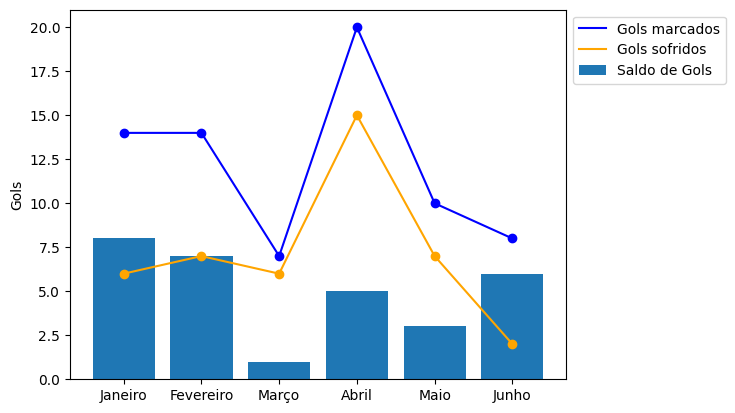

In [18]:
#j_marcou_casa[['home_score', 'kick-off']]
#j_marcou_casa['kick-off'].dt.month_name()

new_order = ['January', 'February', 'March', 'April', 'May', 'June'] 
             #'July', 'August', 'September', 'October', 'November', 'December']
    
labels = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']

gols_home = j_marcou_casa.groupby(j_marcou_casa['kick-off'].dt.month_name())['home_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)
gols_away = j_marcou_fora.groupby(j_marcou_fora['kick-off'].dt.month_name())['away_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)

sofridos_home = j_sofreu_casa.groupby(j_sofreu_casa['kick-off'].dt.month_name())['away_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)
sofridos_away = j_sofreu_fora.groupby(j_sofreu_fora['kick-off'].dt.month_name())['home_score'].agg(['sum', 'mean']).reindex(new_order, axis=0)

gols_feitos_total = gols_home['sum'].fillna(0)+gols_away['sum'].fillna(0)
gols_sofridos_total = sofridos_home['sum'].fillna(0)+sofridos_away['sum'].fillna(0)

saldo = gols_feitos_total - gols_sofridos_total

gols_feitos_media = gols_home['mean'].fillna(0)+gols_away['mean'].fillna(0)
gols_sofridos_media = sofridos_home['mean'].fillna(0)+sofridos_away['mean'].fillna(0)

#plt.rcParams["figure.autolayout"] = True

plt.bar(saldo.index, saldo, label = 'Saldo de Gols')


plt.plot(gols_feitos_total.index, gols_feitos_total, c = 'blue', label = 'Gols marcados')
plt.scatter(gols_feitos_total.index, gols_feitos_total, c = 'blue')


plt.plot(gols_sofridos_total.index, gols_sofridos_total, c = 'orange', label = 'Gols sofridos')
plt.scatter(gols_sofridos_total.index, gols_sofridos_total, c = 'orange')


#plt.axhline(gols_feitos_total.mean(), ls = '--', c = 'blue', label = 'Média de gols marcados')
#plt.axhline(gols_sofridos_total.mean(), ls = '--', c = 'orange', label = 'Média de gols sofridos')

plt.ylabel('Gols')
plt.xticks(gols_home.index, labels)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')


plt.savefig('figures/figure.png', dpi = 300, bbox_inches='tight')
 
plt.show()

In [19]:
lista = [i.split(' -', 1)[0] for i in jogos["tournament"].tolist()]

In [20]:
pd.value_counts(lista)

Carioca                         15
Campeonato Brasileiro            9
Copa Libertadores da América     5
Copa do Brasil                   4
Club World Championship          2
Recopa Sudamericana              2
Supercopa do Brasil              1
dtype: int64

In [21]:
pd.concat([vitorias_casa, vitorias_fora], sort=False).sort_index()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium
0,CA1,Flamengo,Audax-RJ,1,0,Carioca - Taça Guanabara - Round 5,2023-01-12 21:30:00,Maracanã-RJ
1,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ
3,CA4,Flamengo,Nova Iguaçu-RJ,5,0,Carioca - Taça Guanabara - Round 3,2023-01-21 16:00:00,Maracanã-RJ
6,CA6,Flamengo,Boavista,1,0,Carioca - Taça Guanabara - Round 6,2023-02-01 21:10:00,Maracanã-RJ
8,CW2,Al Ahly SC,Flamengo,2,4,Club World Championship - 3rd place final,2023-02-11 12:30:00,Complexe Sportif Moulay Abdellah-Marrocos
9,CA7,Volta Redonda,Flamengo,1,3,Carioca - Taça Guanabara - Round 8,2023-02-16 21:10:00,Raulino de Oliveira-RJ
10,CA8,Resende,Flamengo,0,2,Carioca - Taça Guanabara - Round 7,2023-02-18 16:00:00,Raulino de Oliveira-RJ
12,CA9,Botafogo,Flamengo,0,1,Carioca - Taça Guanabara - Round 9,2023-02-25 18:00:00,Mané Garrincha-DF
13,RE2,Flamengo,Independiente del Valle,1,0,Recopa Sudamericana - Second leg,2023-02-28 21:30:00,Maracanã-RJ
16,CA12,Flamengo,Vasco,3,2,Carioca - Semifinal - First leg,2023-03-13 21:25:00,Maracanã-RJ


In [22]:
pd.concat([derrotas_casa, derrota_fora], sort=False).sort_index()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium
5,SC1,Palmeiras,Flamengo,4,3,Supercopa do Brasil,2023-01-28 16:30:00,Mané Garrincha-DF
7,CW1,Flamengo,Al-Hilal Saudi,2,3,Club World Championship - Semifinal,2023-02-07 16:00:00,Ibn Batouta Stadium-Marrocos
11,RE1,Independiente del Valle,Flamengo,1,0,Recopa Sudamericana - First leg,2023-02-21 21:30:00,Banco de Guayaquil-Equador
14,CA10,Flamengo,Vasco,0,1,Carioca - Taça Guanabara - Round 10,2023-03-05 18:10:00,Maracanã-RJ
15,CA11,Flamengo,Fluminense,1,2,Carioca - Taça Guanabara - Round 11,2023-03-09 21:10:00,Maracanã-RJ
19,LIB1,Aucas,Flamengo,2,1,Copa Libertadores da América - Round 1,2023-04-05 19:00:00,Gonzalo Pozo Ripalda-Equador
20,CA15,Fluminense,Flamengo,4,1,Carioca - Final - Second leg,2023-04-09 18:00:00,Maracanã-RJ
21,CB1,Maringá,Flamengo,2,0,Copa do Brasil - Round 3 - First leg,2023-04-13 20:00:00,Willie Davids-PR
24,BR2,Internacional,Flamengo,2,1,Campeonato Brasileiro - Round 2,2023-04-23 11:30:00,Beira Rio-RS
26,BR3,Flamengo,Botafogo,2,3,Campeonato Brasileiro - Round 3,2023-04-30 16:00:00,Maracanã-RJ


In [23]:
pd.concat([empate_casa, empate_fora], sort=False).sort_index()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium
2,CA3,Madureira-RJ,Flamengo,0,0,Carioca - Taça Guanabara - Round 2,2023-01-18 19:00:00,Kléber Andrade-ES
4,CA5,Bangu-RJ,Flamengo,1,1,Carioca - Taça Guanabara - Round 4,2023-01-24 21:10:00,Raulino de Oliveira-RJ
27,LIB3,Racing,Flamengo,1,1,Copa Libertadores da América - Round 3,2023-05-04 19:00:00,Presidente Perón-Argentina
31,CB3,Fluminense,Flamengo,0,0,Copa do Brasil - Round 4 - First leg,2023-05-16 21:00:00,Maracanã-RJ
33,LIB4,Ñublense,Flamengo,1,1,Copa Libertadores da América - Round 4,2023-05-24 21:30:00,Municipal de Collao-Chile
34,BR8,Flamengo,Cruzeiro,1,1,Campeonato Brasileiro - Round 8,2023-05-27 18:30:00,Maracanã-RJ


In [24]:
aux1 = j_marcou_casa.groupby(j_marcou_casa['kick-off'].dt.month_name())['home_score'].agg(['sum', 'mean', 'std', 'size']).reindex(new_order, axis=0)

aux2 = j_marcou_fora.groupby(j_marcou_fora['kick-off'].dt.month_name())['away_score'].agg(['sum', 'mean', 'std', 'size']).reindex(new_order, axis=0)

aux1.fillna(0) + aux2.fillna(0)




,sum,mean,std,size
kick-off,,,,
January,14,5.333333,3.495880,5
February,14,3.833333,1.868345,7
March,7,5.000000,1.414214,3
April,20,4.400000,2.607681,8
May,10,2.833333,1.577350,7
June,8,6.000000,0.000000,3


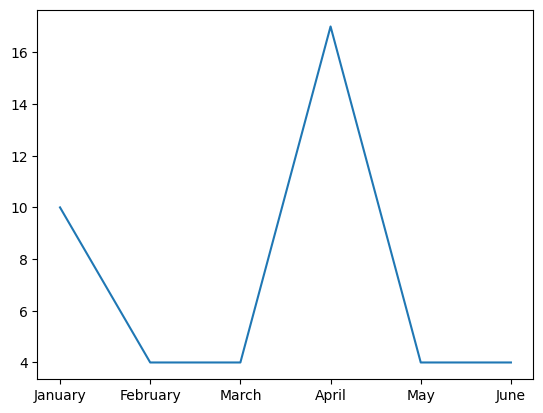

In [25]:
#plt.scatter(aux1['sum'].index, aux1['sum'])
plt.plot(aux1['sum'].index, aux1['sum'])
#plt.errorbar(aux1['mean'].index, aux1['mean'], yerr=aux1['std'])

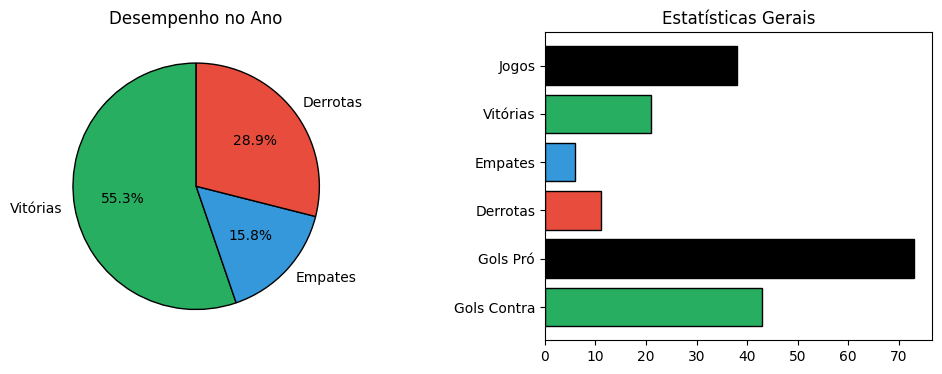

In [36]:
# Configuração dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de pizza - Número de jogos totais
#axs[0].pie([total_jogos], labels=['Jogos Totais'], autopct='%1.1f%%', startangle=90)
#axs[0].set_title('Número de Jogos Totais')

# Gráfico de pizza - Divisão entre vitórias, empates e derrotas
axs[0].pie([vitorias, empates, derrotas], labels=['Vitórias', 'Empates', 'Derrotas'], 
           autopct='%1.1f%%', startangle=90, colors=['#27AE60', '#3498DB', '#E74C3C'], wedgeprops={'edgecolor': 'black'})
axs[0].set_title('Desempenho no Ano')

# Gráfico de barras horizontais - Jogos, vitórias, empates, derrotas, gols pró e gols contra
labels = ['Gols Contra', 'Gols Pró', 'Derrotas', 'Empates', 'Vitórias', 'Jogos']
values = [gols_contra, gols_pro, derrotas, empates, vitorias, total_jogos]
         
axs[1].barh(labels, values, color=['#27AE60', 'black', '#E74C3C', '#3498DB'], edgecolor='black')

axs[1].set_title('Estatísticas Gerais')

# Ajustar a posição dos subplots
plt.subplots_adjust(wspace=0.4)

plt.savefig('figures/figure2.png', dpi = 300, bbox_inches='tight')

# Exibir o gráfico
plt.show()